In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
%matplotlib inline

### load the image

[[ 0  0  0 ...  0  0  0]
 [24 30 31 ... 32 32  0]
 [24 30 31 ... 31 32  0]
 ...
 [24 30 31 ... 30 31  0]
 [24 30 31 ... 30 31  0]
 [24 30 32 ... 30 31  0]]


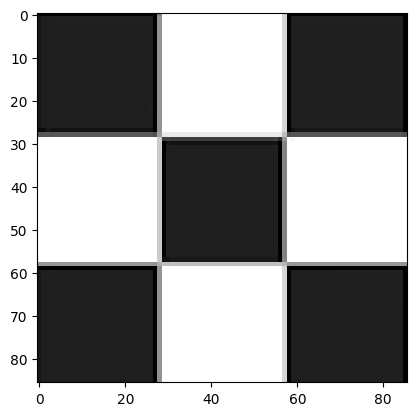

In [2]:
img = cv.imread("/content/checkerboard_86x86.png", 0)

plt.imshow(img, cmap='gray')
print(img)

### Accessing individual pixels

In [3]:
print(img[0,0])
print(img[1,6])

0
32


### Modifying the image pixels

[[  0   0   0 ...   0   0   0]
 [ 24  30  31 ...  32  32   0]
 [ 24  30 200 ...  31  32   0]
 ...
 [ 24  30  31 ...  30  31   0]
 [ 24  30  31 ...  30  31   0]
 [ 24  30  32 ...  30  31   0]]


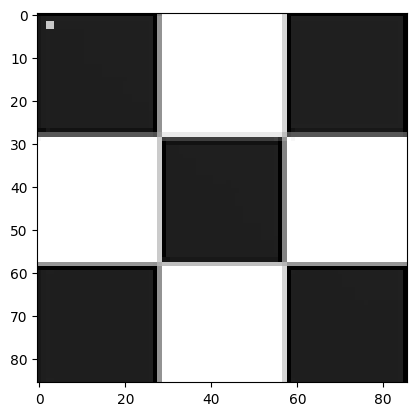

In [4]:
img_copy = img.copy()
img_copy[2,2] = 200
img_copy[2,3] = 200
img_copy[3,2] = 200
img_copy[3,3] = 200

plt.imshow(img_copy, cmap='gray')
print(img_copy)

### Cropping the image

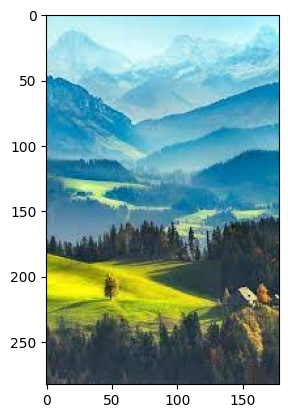

In [5]:
scene_img = cv.imread("/content/scene.jpg",1)
scene_rgb = scene_img[:,:,::-1]

plt.imshow(scene_rgb)

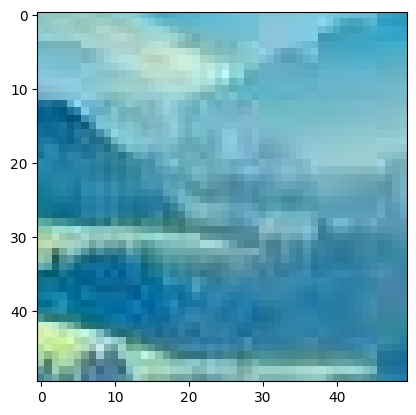

In [6]:
#crop the image
scene_crop = scene_rgb[100:150, 50:100]
plt.imshow(scene_crop)

### Resizing the image

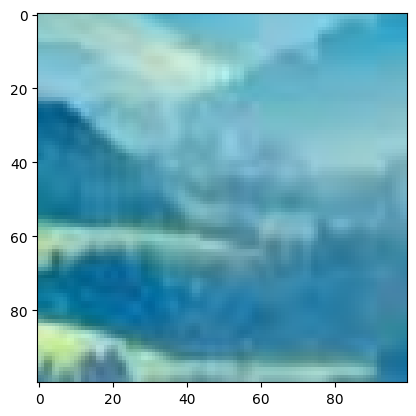

In [7]:
''' Method.1
Specifying the Scaling factors fx and fy
'''

resized_img = cv.resize(scene_crop, None, fx=2,fy=2)
plt.imshow(resized_img)

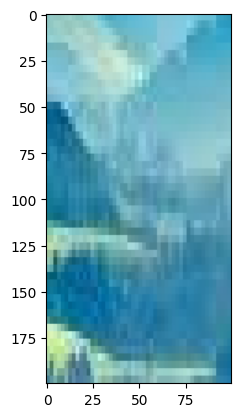

In [8]:
''' Method.2
Specifying the exact size of output image
'''

desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

#resize to logo size
new_resized_img = cv.resize(scene_crop, dsize=dim, interpolation=cv.INTER_AREA)
plt.imshow(new_resized_img)

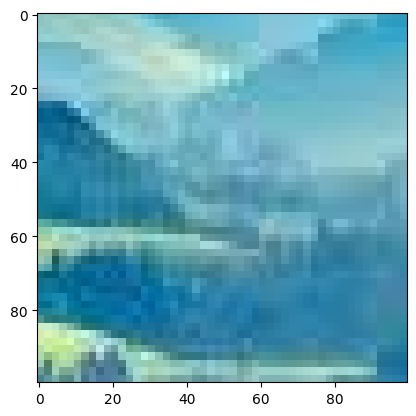

In [9]:
'''Method.3
Resize while maintaing aspect ratio
'''

desired_width = 100
aspect_ratio = desired_width/scene_crop.shape[1]
desired_height = int(scene_crop.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

#resize_image
maintained_image = cv.resize(scene_crop, dsize=dim, interpolation=cv.INTER_AREA)
plt.imshow(maintained_image)

### Actual Resized Image

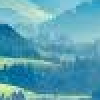

In [11]:
actual_resized_img = maintained_image[:,:,::-1]
cv.imwrite("actual_resized_img.png", actual_resized_img)
Image(filename="actual_resized_img.png")

### Flipping Images

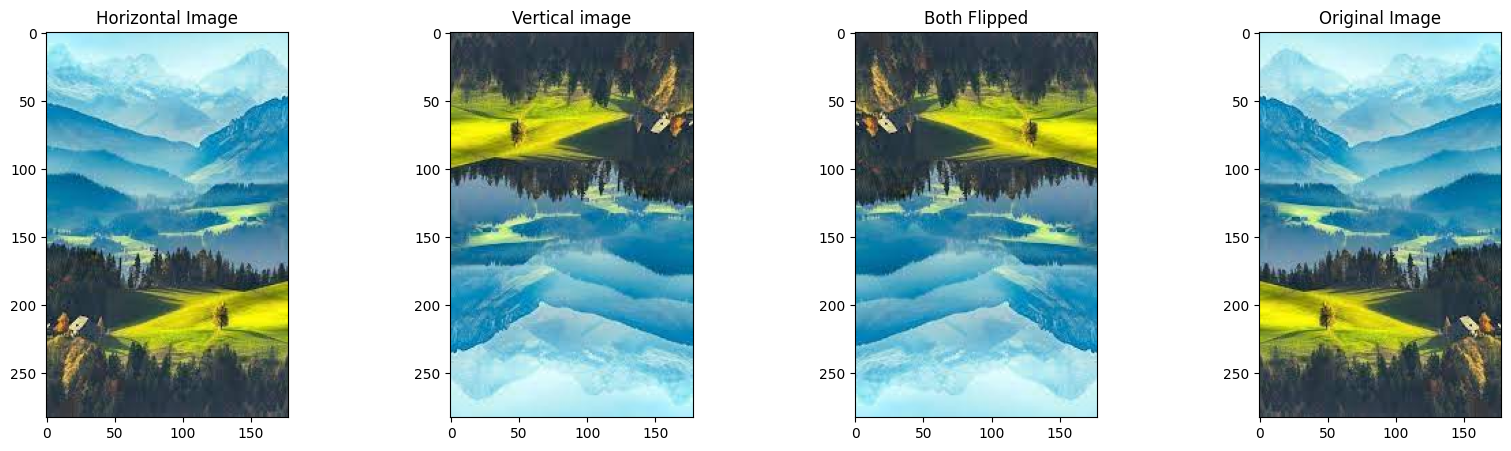

In [12]:
img_horz = cv.flip(scene_rgb,1)
img_vert = cv.flip(scene_rgb,0)
img_both = cv.flip(scene_rgb,-1)

plt.figure(figsize=(20,5))
plt.subplot(141); plt.imshow(img_horz); plt.title("Horizontal Image");
plt.subplot(142); plt.imshow(img_vert); plt.title("Vertical image");
plt.subplot(143); plt.imshow(img_both); plt.title("Both Flipped");
plt.subplot(144); plt.imshow(scene_rgb); plt.title("Original Image");